In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
combined = pd.read_csv("/Users/admin/Desktop/Y3S2/BT4222/combined.csv")

In [2]:
combined = combined.drop(combined.columns[0], axis=1)

In [3]:
combined.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,5,ZEHNDER ROAD,Semi-detached,999.00,5500000.0,27,6,8,0,-1.0,1.282130,103.786879,524.3,~-,0.380502
1,5,ZEHNDER ROAD,Semi-detached,999.00,5000000.0,27,6,8,0,-1.0,1.282130,103.786879,308.0,~-,0.123495
2,5,ZEHNDER ROAD,Semi-detached,999.00,4750000.0,27,6,8,0,-1.0,1.282130,103.786879,314.0,~-,0.123495
3,5,NEO PEE TECK LANE,Terrace,999.00,2630000.0,27,6,8,2,-1.0,1.292047,103.768591,159.3,~-,0.380502
4,4,COVE DRIVE,Condominium,85.25,3180000.0,11,3,2,0,-1.0,1.244208,103.827487,194.0,~01-05,0.173732


In [4]:
combined['floor_range'] = combined['floor_range'].str.replace('~', '')
combined.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,5,ZEHNDER ROAD,Semi-detached,999.00,5500000.0,27,6,8,0,-1.0,1.282130,103.786879,524.3,-,0.380502
1,5,ZEHNDER ROAD,Semi-detached,999.00,5000000.0,27,6,8,0,-1.0,1.282130,103.786879,308.0,-,0.123495
2,5,ZEHNDER ROAD,Semi-detached,999.00,4750000.0,27,6,8,0,-1.0,1.282130,103.786879,314.0,-,0.123495
3,5,NEO PEE TECK LANE,Terrace,999.00,2630000.0,27,6,8,2,-1.0,1.292047,103.768591,159.3,-,0.380502
4,4,COVE DRIVE,Condominium,85.25,3180000.0,11,3,2,0,-1.0,1.244208,103.827487,194.0,01-05,0.173732


## Descriptive Analysis

In [5]:
combined.describe()

,district,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,sentiment
count,133690.000000,133690.000000,1.336900e+05,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000,133690.000000
mean,18.176647,243.957049,9.659421e+05,32.917660,7.020226,10.229396,0.116344,123.908333,1.358712,103.845242,114.587490,0.118408
std,5.357858,5479.242737,1.630981e+06,9.410736,4.201369,5.571115,0.352231,58.367808,0.043492,0.068366,88.967348,0.062837
min,1.000000,2.580000,4.000000e+04,10.000000,1.000000,1.000000,0.000000,-1.000000,1.239641,103.687191,24.000000,-0.122276
25%,16.000000,67.170000,3.700000e+05,25.000000,4.000000,5.000000,0.000000,78.928571,1.325827,103.794725,84.000000,0.070124
50%,20.000000,80.330000,5.050000e+05,37.000000,5.000000,11.000000,0.000000,122.714286,1.355269,103.847709,102.000000,0.103255
75%,20.000000,93.420000,9.500000e+05,37.000000,11.000000,14.000000,0.000000,167.714286,1.389063,103.898665,121.000000,0.151736
max,28.000000,999973.000000,1.090000e+08,51.000000,16.000000,39.000000,2.000000,226.000000,1.460839,103.987293,4836.400000,0.822100


In [6]:
combined.dtypes

district              int64
street               object
propertyType         object
remaining_lease     float64
price               float64
school                int64
hawkercentre          int64
supermarkets          int64
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_area_sqm      float64
floor_range          object
sentiment           float64
dtype: object

In [7]:
combined['district'] = combined['district'].astype(str)

## Correlation Analysis
> Including Correlation Values

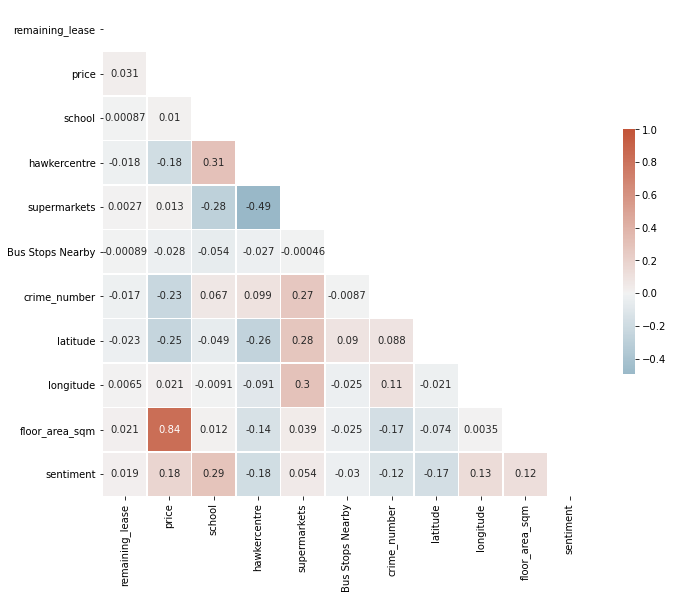

In [8]:
# correlation analysis
corr = combined.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

## Examining Number of Records in Each Category Pre Normalisation

> Bar Plots

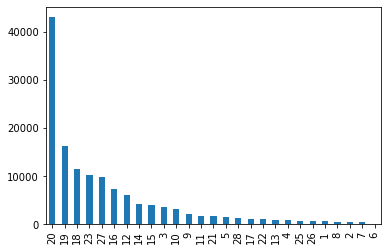

In [9]:
combined['district'].value_counts().plot(kind='bar')

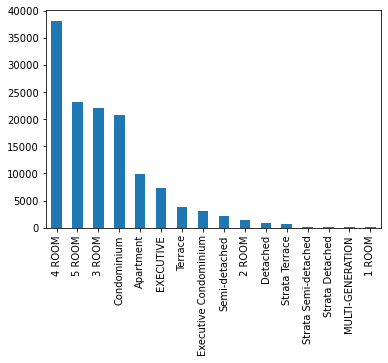

In [10]:
combined['propertyType'].value_counts().plot(kind='bar')

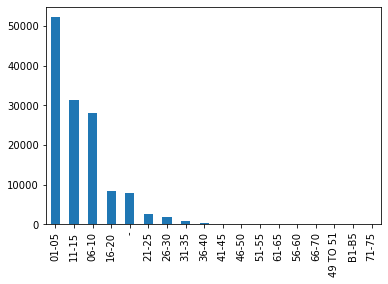

In [11]:
combined['floor_range'].value_counts().plot(kind='bar')

## Variation of Variables with Price

> Pairplot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


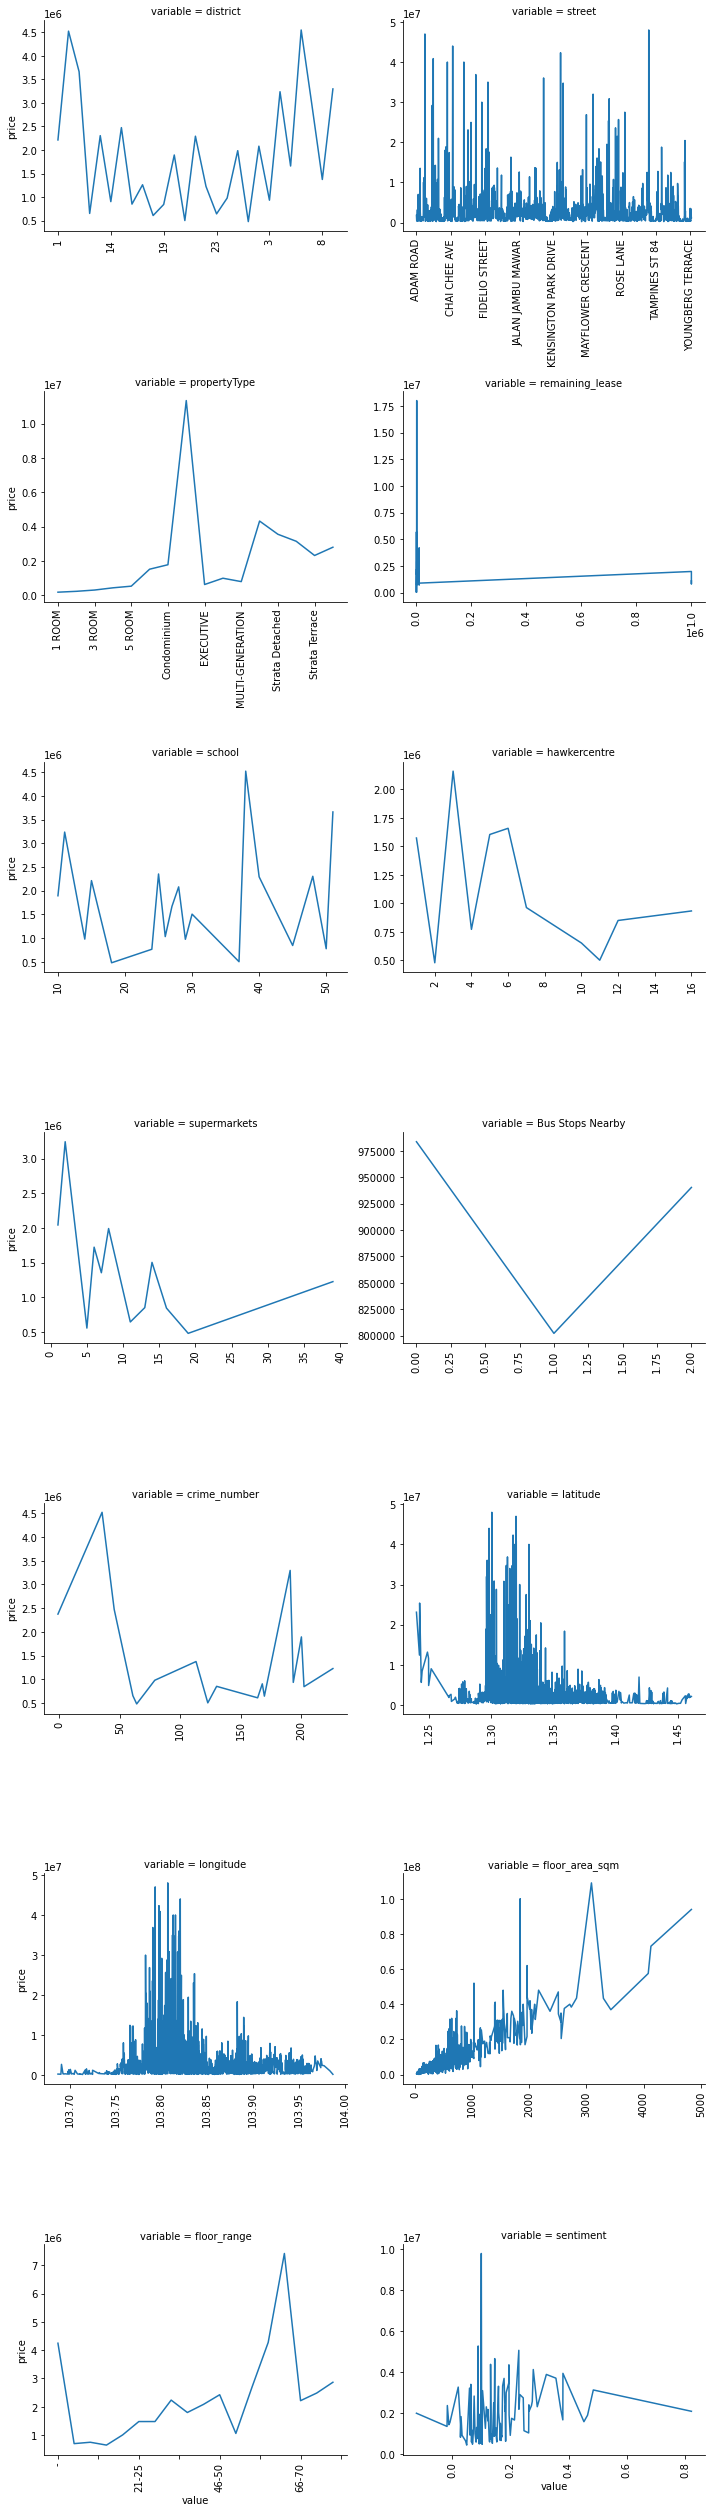

In [12]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
vals = ['district',            
'street',              
'propertyType',      
'remaining_lease',     
'school',             
'hawkercentre',        
'supermarkets',        
'Bus Stops Nearby',   
'crime_number',        
'latitude',           
'longitude',           
'floor_area_sqm',     
'floor_range',         
'sentiment']   
f = pd.melt(combined, id_vars=['price'], value_vars=vals)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "price")

> Scatterplot

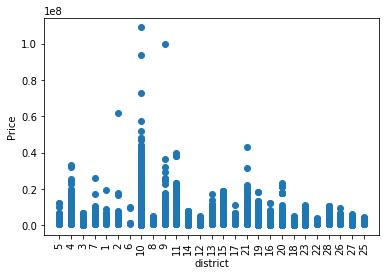

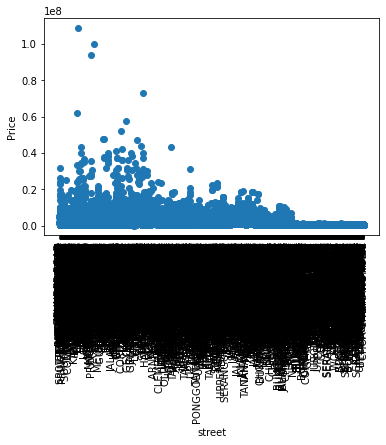

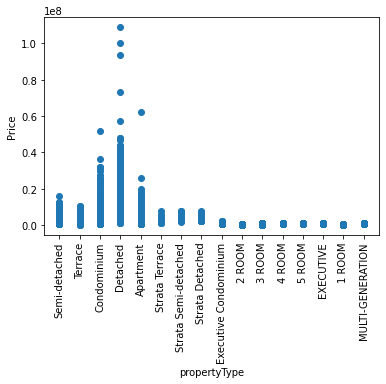

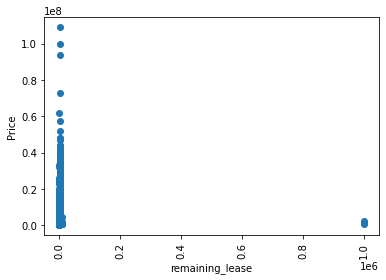

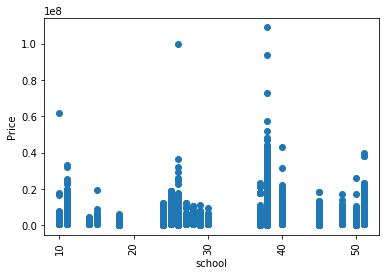

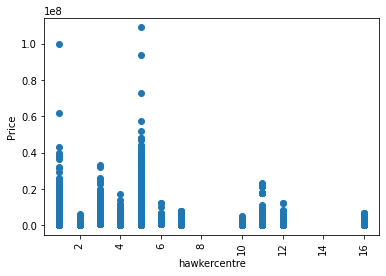

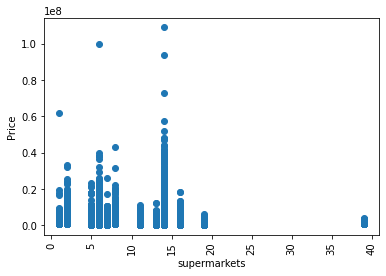

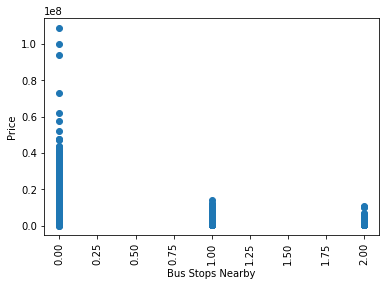

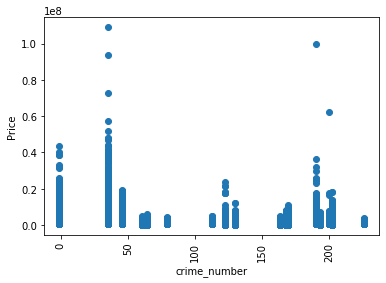

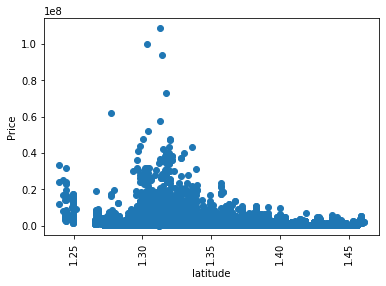

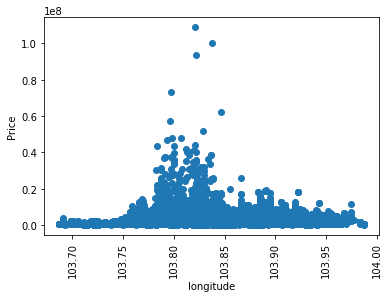

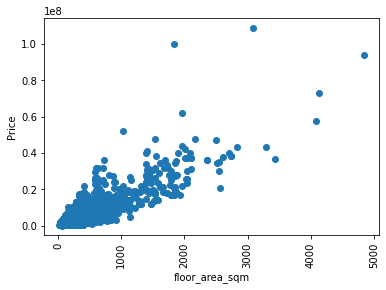

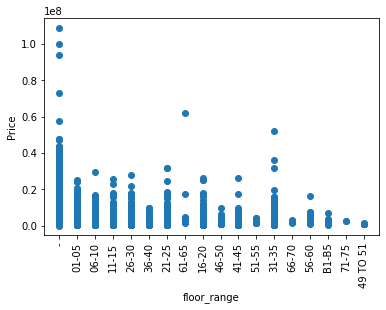

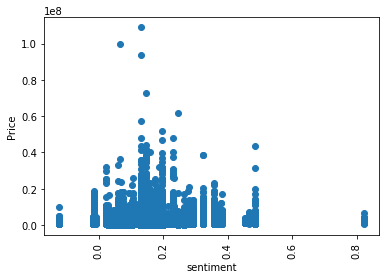

In [13]:
for i in range(len(vals)):
    plt.scatter(combined[vals[i]],combined["price"])
    plt.ylabel("Price")
    plt.xlabel(vals[i]);
    plt.xticks(rotation=90)
    plt.show()

In [14]:
combined.columns

Index(['district', 'street', 'propertyType', 'remaining_lease', 'price',
       'school', 'hawkercentre', 'supermarkets', 'Bus Stops Nearby',
       'crime_number', 'latitude', 'longitude', 'floor_area_sqm',
       'floor_range', 'sentiment'],
      dtype='object')

## Examining Categorical Variables against Price

> District

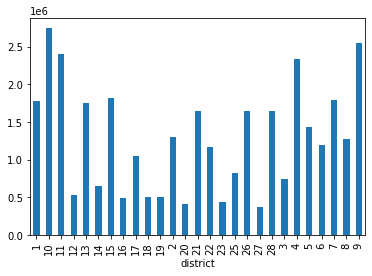

In [15]:
combined.groupby('district').price.agg(pd.Series.median).plot.bar()

#sns.barplot(combined["district"],combined["price"])

> Property Type

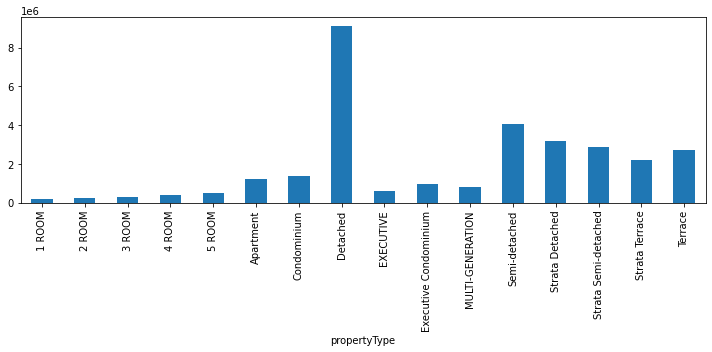

In [16]:
plt.figure(figsize=(10,5)) 
combined.groupby('propertyType').price.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["propertyType"],combined["price"])
plt.xticks(rotation=90)
plt.tight_layout()

> Schools Nearby

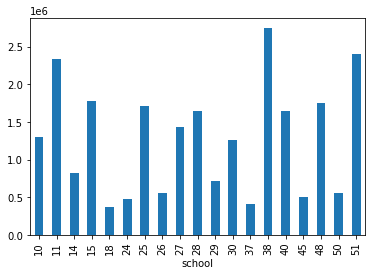

In [17]:
combined.groupby('school').price.agg(pd.Series.median).plot.bar()

> Hawker Centres Nearby

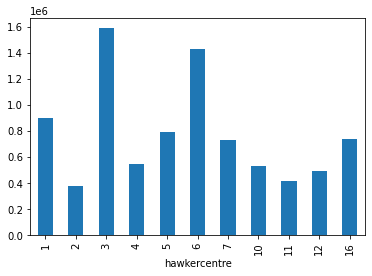

In [18]:
combined.groupby('hawkercentre').price.agg(pd.Series.median).plot.bar()

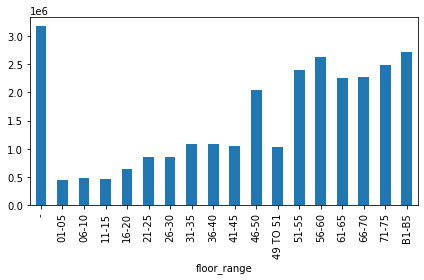

In [19]:
combined.groupby('floor_range').price.agg(pd.Series.median).plot.bar()
plt.xticks(rotation=90)
plt.tight_layout()

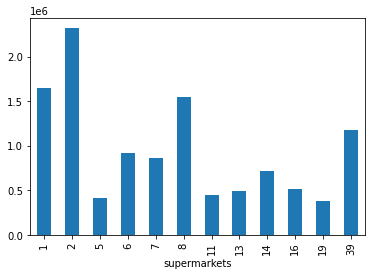

In [20]:
combined.groupby('supermarkets').price.agg(pd.Series.median).plot.bar()

## Examine Number of Crimes within Districts

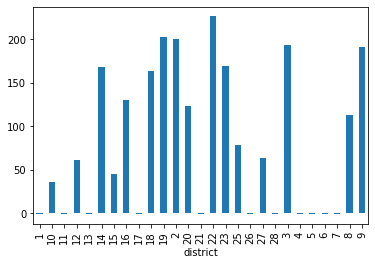

In [21]:
combined.groupby('district').crime_number.agg(pd.Series.median).plot.bar()

## Examining the Types of Properties amongst Districts

<Figure size 14400x7200 with 0 Axes>

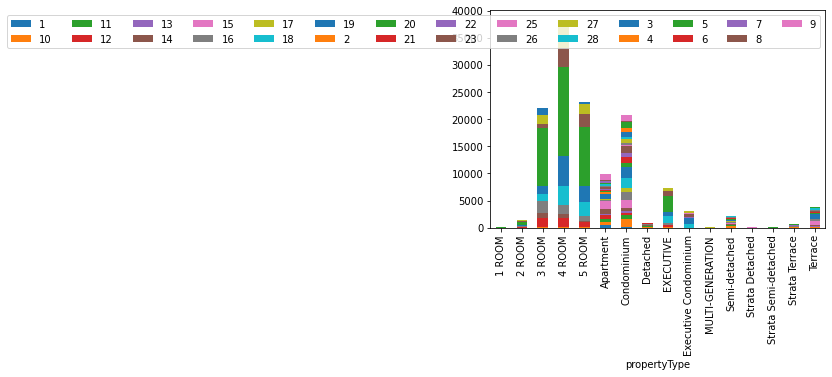

In [22]:
#sns.countplot(combined["district"],hue = combined["propertyType"])
plt.figure(figsize=(200,100)) 

combined.groupby('district').propertyType.value_counts().unstack(0).plot(kind='bar', stacked= True)
plt.legend(loc="upper right", ncol=len(combined.columns)-1)


## Overall Sentiment Per District

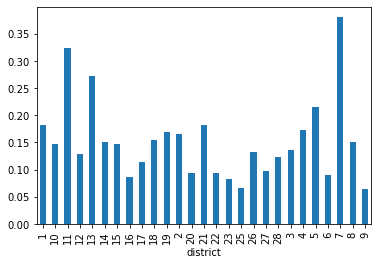

In [23]:
combined.groupby('district').sentiment.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"],combined["sentiment"])

## Supermarkets in each district

> Number of Supermarkets in all districts the same? might need to check data cleaning

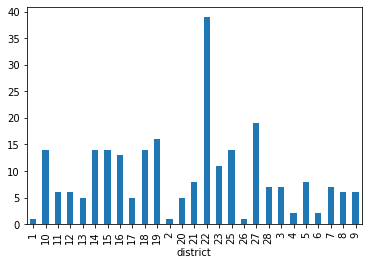

In [24]:
combined.groupby('district').supermarkets.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"],combined["supermarkets"])

## Hawkercentres Per District

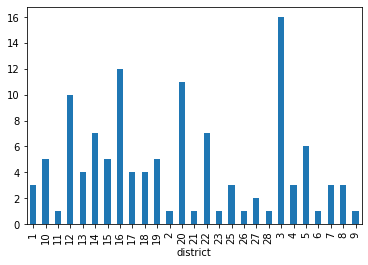

In [25]:
combined.groupby('district').hawkercentre.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"],combined["hawkercentre"])

## Schools Per District

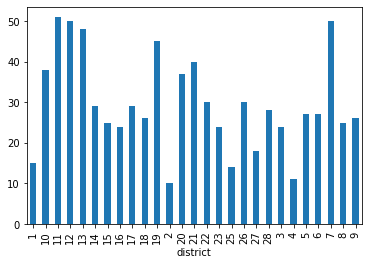

In [26]:
combined.groupby('district').school.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"],combined["school"])

## Floor Area Per District

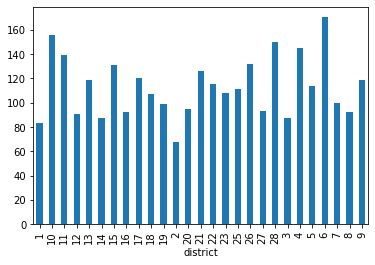

In [27]:
combined.groupby('district').floor_area_sqm.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"], combined["floor_area_sqm"])

## Remaining Lease Per District

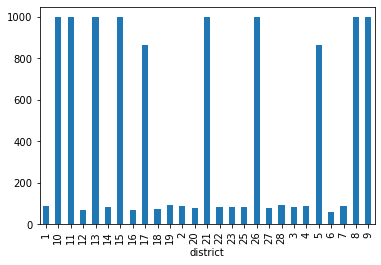

In [28]:
combined.groupby('district').remaining_lease.agg(pd.Series.median).plot.bar()